This an example on how to calculate the bikeability index based on Hardinghaus et. al. 2020

First, we are loading all the necessary packages. If this does not work, pleas look at the installation instructions

In [2]:
import os
from bikeability import bikeability
import geopandas as gpd

now, lets import some data. This is an example dataset of buffered gps tracks of bike trips.

In [2]:
project_path = os.path.abspath('../')
aggregation_boundaries = gpd.read_file(project_path+f"\\data\\cargo_test.gpkg").to_crs(epsg='4326')

we can have a look how this looks like

<Axes: >

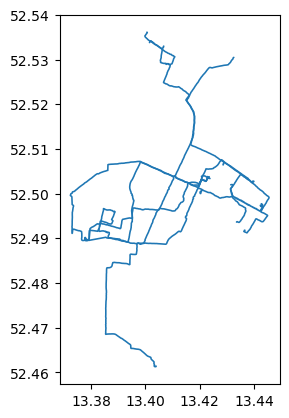

In [3]:
aggregation_boundaries.plot()

ok. let's define some configuration parameters. We need an id column in the aggregation dataset. If this is not present, create one in your favorite GIS software.
the parameter download illustrates if data should be downloaded directly from osm or not. be careful: if you are calculating the index for the first time for new aggregation geometries you have to download all the data first.

In [4]:
id_column = "track_id"
download = True
verbose = 1
agg_table = aggregation_boundaries[[id_column, "person_id", "geometry"]]

In [6]:
bikeability_gdf = bikeability.calc_bikeability(id_column, agg_table, download=download, verbose=verbose)

Generating bikeability indicator

downloading street network and additional data from osm

downloading green spaces from osm

downloading bike shops from osm

share of cycling infrastructure calculated

share of small streets calculated

green share calculated

node density calculated

shop density calculated

Bikeability has been calculated for 9 geometries



In [5]:
bikeability_gdf.plot(column= "bikeability", legend=True)

NameError: name 'bikeability_gdf' is not defined

In [ ]:
bikeability_gdf.to_file(project_path+f"\\data/bikeability.gpkg", driver="GPKG")

We can also do this with city districts.

In [3]:
project_path = os.path.abspath('../')
aggregation_boundaries = gpd.read_file(project_path+f"\\data\\sg_test.gpkg").to_crs(epsg='4326')

In [4]:
id_column = "sg_id"
download = True
verbose = 1
agg_table = aggregation_boundaries[[id_column, "geometry"]]

In [5]:
bikeability_gdf = bikeability.calc_bikeability(id_column, agg_table, download=download, verbose=verbose)

Generating bikeability indicator

downloading street network and additional data from osm

downloading green spaces from osm

downloading bike shops from osm

share of cycling infrastructure calculated

share of small streets calculated

green share calculated

node density calculated

shop density calculated

bikeability values have been calculated for 11 geometries



<Axes: >

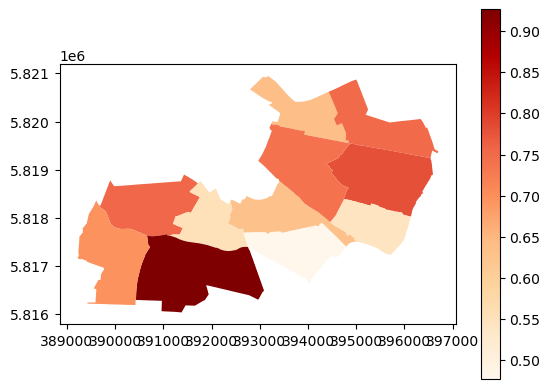

In [27]:
bikeability_gdf.plot(column= "bikeability", cmap="OrRd", legend=True)

<Axes: >

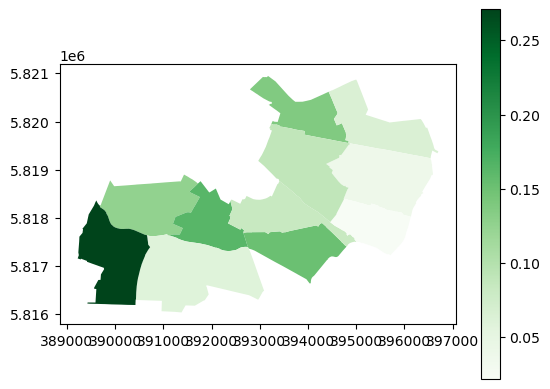

In [7]:
bikeability_gdf.plot(column= "urban_green_share", cmap="Greens", legend=True)